<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1300, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6f76b437-a1cb-4a9f-946d-53304e238072,asep dadang sudjana,https://play-lh.googleusercontent.com/a-/ACNPE...,"Saya pelanggan setia pengguna bukalapak, sejak...",3,26,5.23.1,2022-11-08 05:37:54,None,NaT
1,2508beff-a7f5-4aaf-ad4b-3d2eb671f889,Budiman Android16,https://play-lh.googleusercontent.com/a/ALm5wu...,Sistem nya paraaah... seller ingin mengecek pe...,1,92,5.23.1,2022-11-01 09:44:28,None,NaT
2,d09a6f73-c7df-4063-973c-0128f19ab993,Mizannudin Hardiyansyah,https://play-lh.googleusercontent.com/a-/ACNPE...,"Aplikasi belanja yang sangat buruk, CS nya ga ...",1,14,5.23.1,2022-11-10 02:18:44,None,NaT
3,1508b9c9-4046-4cf8-8d0f-74064ba192d2,Andy Askandar,https://play-lh.googleusercontent.com/a/ALm5wu...,"Aplikasi yang paling tidak guna,udah di Adain ...",1,61,5.23.1,2022-11-03 11:30:04,None,NaT
4,572648aa-e153-4cf8-9250-37e88ae2945c,Wijaya KOMPUTER Laptop-PC-Android-Apple,https://play-lh.googleusercontent.com/a-/ACNPE...,Kepada Yth.BUKALAPAK kekurangan saat ini adala...,2,71,5.23.1,2022-11-02 04:24:26,"Hai, mohon maaf atas kendalanya. Mohon infokan...",2020-06-20 13:49:53


In [ ]:
len(df_busu.index) #count the number of data we got

1300

In [ ]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
1295,koko vega,1,2022-07-20 04:19:24,Hallo cs...mau tanya saya isi saldo dana kok s...
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah.. polonya mah.. man...
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,Cepat dan aman sesuai deskripsi
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,Belanja aneka kebutuhan jadi praktis dan efisi...
1299,rini Sugiyarsi,5,2022-08-25 11:50:40,"Belanja disini banyak keuntunganya lho, Harga ..."


In [ ]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [ ]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
1295,koko vega,1,2022-07-20 04:19:24,Hallo cs...mau tanya saya isi saldo dana kok s...
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah.. polonya mah.. man...
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,Cepat dan aman sesuai deskripsi
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,Belanja aneka kebutuhan jadi praktis dan efisi...
1299,rini Sugiyarsi,5,2022-08-25 11:50:40,"Belanja disini banyak keuntunganya lho, Harga ..."


In [ ]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1300 non-null   object        
 1   Rating         1300 non-null   int64         
 2   Date           1300 non-null   datetime64[ns]
 3   Ulasan         1300 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.8+ KB


In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,asep dadang sudjana,3,2022-11-08 05:37:54,"Saya pelanggan setia pengguna bukalapak, sejak..."
1,Budiman Android16,1,2022-11-01 09:44:28,Sistem nya paraaah... seller ingin mengecek pe...
2,Mizannudin Hardiyansyah,1,2022-11-10 02:18:44,"Aplikasi belanja yang sangat buruk, CS nya ga ..."
3,Andy Askandar,1,2022-11-03 11:30:04,"Aplikasi yang paling tidak guna,udah di Adain ..."
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,2,2022-11-02 04:24:26,Kepada Yth.BUKALAPAK kekurangan saat ini adala...


In [ ]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [ ]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [ ]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [ ]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [ ]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [ ]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ..."
1,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek..."
2,Mizannudin Hardiyansyah,1,2022-11-10 02:18:44,aplikasi belanja yang sangat buruk cs nya ga a...,"[aplikasi, belanja, yang, sangat, buruk, cs, n..."
3,Andy Askandar,1,2022-11-03 11:30:04,aplikasi yang paling tidak gunaudah di adain p...,"[aplikasi, yang, paling, tidak, gunaudah, di, ..."
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,2,2022-11-02 04:24:26,kepada ythbukalapak kekurangan saat ini adalah...,"[kepada, ythbukalapak, kekurangan, saat, ini, ..."
...,...,...,...,...,...
1295,koko vega,1,2022-07-20 04:19:24,hallo csmau tanya saya isi saldo dana kok susa...,"[hallo, csmau, tanya, saya, isi, saldo, dana, ..."
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah polonya mah mantapp...,"[toko, online, rekomended, lah, polonya, mah, ..."
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,cepat dan aman sesuai deskripsi,"[cepat, dan, aman, sesuai, deskripsi]"
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,belanja aneka kebutuhan jadi praktis dan efisi...,"[belanja, aneka, kebutuhan, jadi, praktis, dan..."


In [ ]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [ ]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
258,LATIFI,5,2022-11-11 08:34:18,saya kecewa dengan menu pembayaran kartu kredi...,"[saya, kecewa, dengan, menu, pembayaran, kartu..."
19,Mas bagoess Kocak,2,2022-11-10 14:26:12,menu buka bantuan makin lama makin lemot udah ...,"[menu, buka, bantuan, makin, lama, makin, lemo..."
291,Fitri Angriani,5,2022-11-10 12:37:22,harga blakangan asal tidak jauh beda kualitas ...,"[harga, blakangan, asal, tidak, jauh, beda, ku..."
349,angga rizki pratama,1,2022-11-10 11:53:28,tolong aktifkan pengiriman gojek instan saya t...,"[tolong, aktifkan, pengiriman, gojek, instan, ..."
63,Astajib Maulana,1,2022-11-10 11:16:20,saya telah melakukan pembatalan transaksi krna...,"[saya, telah, melakukan, pembatalan, transaksi..."


In [ ]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [ ]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(versi, 3), (update, 2), (masukan, 2), (riway...
1    [(nya, 3), (komplain, 3), (mengecek, 2), (tak,...
2    [(yang, 4), (ga, 4), (cs, 3), (bisa, 3), (kali...
3    [(tidak, 4), (yang, 2), (pay, 2), (later, 2), ...
4    [(tidak, 3), (ada, 3), (atau, 3), (pembayaran,...
Name: Ulasan_tokenize, dtype: object


In [ ]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [saya, pelanggan, setia, pengguna, bukalapak, ...
1       [sistem, nya, paraaah, seller, ingin, mengecek...
2       [aplikasi, belanja, yang, sangat, buruk, cs, n...
3       [aplikasi, yang, paling, tidak, gunaudah, di, ...
4       [kepada, ythbukalapak, kekurangan, saat, ini, ...
                              ...                        
1295    [hallo, csmau, tanya, saya, isi, saldo, dana, ...
1296    [toko, online, rekomended, lah, polonya, mah, ...
1297                [cepat, dan, aman, sesuai, deskripsi]
1298    [belanja, aneka, kebutuhan, jadi, praktis, dan...
1299    [belanja, disini, banyak, keuntunganya, lho, h...
Name: Ulasan_tokenize, Length: 1300, dtype: object>

In [ ]:
slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [ ]:
normalizad_word = pd.read_csv("/content/kamusindonesia.csv.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [ ]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ..."
1,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ..."
2,Mizannudin Hardiyansyah,1,2022-11-10 02:18:44,aplikasi belanja yang sangat buruk cs nya ga a...,"[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, yang, sangat, buruk, cs, n..."
3,Andy Askandar,1,2022-11-03 11:30:04,aplikasi yang paling tidak gunaudah di adain p...,"[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, yang, paling, tidak, gunaudah, di, ..."
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,2,2022-11-02 04:24:26,kepada ythbukalapak kekurangan saat ini adalah...,"[kepada, ythbukalapak, kekurangan, saat, ini, ...","[kepada, ythbukalapak, kekurangan, saat, ini, ..."
...,...,...,...,...,...,...
1295,koko vega,1,2022-07-20 04:19:24,hallo csmau tanya saya isi saldo dana kok susa...,"[hallo, csmau, tanya, saya, isi, saldo, dana, ...","[halo, csmau, tanya, saya, isi, saldo, dana, k..."
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah polonya mah mantapp...,"[toko, online, rekomended, lah, polonya, mah, ...","[toko, online, rekomendasi, lah, polonya, mah,..."
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,cepat dan aman sesuai deskripsi,"[cepat, dan, aman, sesuai, deskripsi]","[cepat, dan, aman, sesuai, deskripsi]"
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,belanja aneka kebutuhan jadi praktis dan efisi...,"[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, jadi, praktis, dan..."


In [ ]:
name_dataframe['Ulasan_normalized'].unique

<bound method Series.unique of 0       [saya, pelanggan, setia, pengguna, bukalapak, ...
1       [sistem, nya, parah, seller, ingin, mengecek, ...
2       [aplikasi, belanja, yang, sangat, buruk, cs, n...
3       [aplikasi, yang, paling, tidak, gunaudah, di, ...
4       [kepada, ythbukalapak, kekurangan, saat, ini, ...
                              ...                        
1295    [halo, csmau, tanya, saya, isi, saldo, dana, k...
1296    [toko, online, rekomendasi, lah, polonya, mah,...
1297                [cepat, dan, aman, sesuai, deskripsi]
1298    [belanja, aneka, kebutuhan, jadi, praktis, dan...
1299    [belanja, disini, banyak, keuntunganya, lho, h...
Name: Ulasan_normalized, Length: 1300, dtype: object>

In [ ]:
from nltk.corpus import stopwords

In [ ]:
list_stopwords = stopwords.words('indonesian')

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update..."
1,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual..."
2,Mizannudin Hardiyansyah,1,2022-11-10 02:18:44,aplikasi belanja yang sangat buruk cs nya ga a...,"[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, buruk, cs, nya, pakai, rob..."
3,Andy Askandar,1,2022-11-03 11:30:04,aplikasi yang paling tidak gunaudah di adain p...,"[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, gunaudah, mengadakan, pay, later, b..."
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,2,2022-11-02 04:24:26,kepada ythbukalapak kekurangan saat ini adalah...,"[kepada, ythbukalapak, kekurangan, saat, ini, ...","[kepada, ythbukalapak, kekurangan, saat, ini, ...","[ythbukalapak, kekurangan, pembayaran, transfe..."
...,...,...,...,...,...,...,...
1295,koko vega,1,2022-07-20 04:19:24,hallo csmau tanya saya isi saldo dana kok susa...,"[hallo, csmau, tanya, saya, isi, saldo, dana, ...","[halo, csmau, tanya, saya, isi, saldo, dana, k...","[halo, csmau, isi, saldo, dana, susahnya, ampu..."
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah polonya mah mantapp...,"[toko, online, rekomended, lah, polonya, mah, ...","[toko, online, rekomendasi, lah, polonya, mah,...","[toko, online, rekomendasi, polonya, mah, mant..."
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,cepat dan aman sesuai deskripsi,"[cepat, dan, aman, sesuai, deskripsi]","[cepat, dan, aman, sesuai, deskripsi]","[cepat, aman, sesuai, deskripsi]"
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,belanja aneka kebutuhan jadi praktis dan efisi...,"[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, praktis, efisien, ..."


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.1 MB/s 


In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 3.8 MB/s 
     |████████████████████████████████| 280 kB 55.8 MB/s 
     |████████████████████████████████| 1.6 MB 46.4 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16323 sha256=1564f4e3b8d8e238a0eed550b76143d1361d388f19a8450ef72739b08a037b3e
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

4298
------------------------
pelanggan : langgan
setia : setia
pengguna : guna
bukalapak : bukalapak
update : update
versi : versi
teranyar : anyar
sistem : sistem
namana : namana
masukan : masuk
tolong : tolong
dipertahankan : tahan
riwayat : riwayat
pengiriman : kirim
dipantau : pantau
harap : harap
dijadikan : jadi
pertimbangan : timbang
kenyamanan : nyaman
pembeli : beli
penjual : jual
terimakasih : terimakasih
nya : nya
parah : parah
seller : seller
mengecek : ecek
penjualan : jual
masuk : masuk
alasan : alas
koneksi : koneksi
internet : internet
bermasalah : masalah
mengakses : akses
marketplace : marketplace
hijau : hijau
oranye : oranye
lancar : lancar
jaya : jaya
komplain : komplain
kendala : kendala
customer : customer
service : service
mudah : mudah
mengajukan : aju
sengaja : sengaja
tutup : tutup
terima : terima
pengajuan : aju
aplikasi : aplikasi
belanja : belanja
buruk : buruk
cs : cs
pakai : pakai
robot : robot
chat : chat
selesaikan : selesai
hatihatai : hatihatai
buka

Pandas Apply:   0%|          | 0/1300 [00:00<?, ?it/s]

In [ ]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed
0,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update...","[langgan, setia, guna, bukalapak, update, vers..."
1,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual...","[sistem, nya, parah, seller, ecek, jual, masuk..."
2,Mizannudin Hardiyansyah,1,2022-11-10 02:18:44,aplikasi belanja yang sangat buruk cs nya ga a...,"[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, buruk, cs, nya, pakai, rob...","[aplikasi, belanja, buruk, cs, nya, pakai, rob..."
3,Andy Askandar,1,2022-11-03 11:30:04,aplikasi yang paling tidak gunaudah di adain p...,"[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, gunaudah, mengadakan, pay, later, b...","[aplikasi, gunaudah, ada, pay, later, beli, pu..."
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,2,2022-11-02 04:24:26,kepada ythbukalapak kekurangan saat ini adalah...,"[kepada, ythbukalapak, kekurangan, saat, ini, ...","[kepada, ythbukalapak, kekurangan, saat, ini, ...","[ythbukalapak, kekurangan, pembayaran, transfe...","[ythbukalapak, kurang, bayar, transfer, bank, ..."
...,...,...,...,...,...,...,...,...
1295,koko vega,1,2022-07-20 04:19:24,hallo csmau tanya saya isi saldo dana kok susa...,"[hallo, csmau, tanya, saya, isi, saldo, dana, ...","[halo, csmau, tanya, saya, isi, saldo, dana, k...","[halo, csmau, isi, saldo, dana, susahnya, ampu...","[halo, csmau, isi, saldo, dana, susah, ampun, ..."
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah polonya mah mantapp...,"[toko, online, rekomended, lah, polonya, mah, ...","[toko, online, rekomendasi, lah, polonya, mah,...","[toko, online, rekomendasi, polonya, mah, mant...","[toko, online, rekomendasi, polo, mah, mantapp..."
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,cepat dan aman sesuai deskripsi,"[cepat, dan, aman, sesuai, deskripsi]","[cepat, dan, aman, sesuai, deskripsi]","[cepat, aman, sesuai, deskripsi]","[cepat, aman, sesuai, deskripsi]"
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,belanja aneka kebutuhan jadi praktis dan efisi...,"[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, praktis, efisien, ...","[belanja, aneka, butuh, praktis, efisien, spar..."


In [ ]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]

In [ ]:
name_dataframe.to_excel("tokped_text.xlsx")

In [ ]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [ ]:
tokenize_ulasan = word_tokenize(ulasan)

In [ ]:
tokenize_ulasan

['menu',
 'apps',
 'contoh',
 'menu',
 'history',
 'kirim',
 'nomor',
 'resi',
 'daftar',
 'transakski',
 'cuman',
 'status',
 'beli',
 'proses',
 'kirim',
 'selesai',
 'history',
 'kirim',
 'status',
 'kirim',
 'akses',
 'website',
 'tolong',
 'lengkap',
 'salah',
 'jual',
 'proses',
 'apknya',
 'bagus',
 'sih',
 'pesan',
 'masuk',
 'order',
 'notifikasi',
 'terkadang',
 'muncul',
 'telat',
 'konfirmasi',
 'pesan',
 'masuk',
 'diomelin',
 'langgan',
 'pesan',
 'batal',
 'tolong',
 'baik',
 'biar',
 'nyaman',
 'pakai',
 'apk',
 'bl',
 'terima',
 'kasih',
 'belanja',
 'ribet',
 'bukalapak',
 'dana',
 'hatihati',
 'belanja',
 'bukalapak',
 'kemarin',
 'isi',
 'token',
 'listrik',
 'isi',
 'saldo',
 'dana',
 'ribu',
 'bukalapak',
 'bayar',
 'token',
 'listrik',
 'verifikasi',
 'sms',
 'wa',
 'celaka',
 'nomor',
 'seluler',
 'hilang',
 'nomor',
 'daftar',
 'wa',
 'ganti',
 'nomor',
 'akun',
 'dana',
 'saldo',
 'hilang',
 'bingung',
 'ribet',
 'belanja',
 'shopee',
 'bayar',
 'shopeepay',
 

In [ ]:
fqdist = FreqDist(tokenize_ulasan)

In [ ]:
fqdist

FreqDist({'bukalapak': 591, 'nya': 433, 'aplikasi': 419, 'barang': 408, 'bayar': 268, 'kirim': 251, 'beli': 245, 'jual': 241, 'lapak': 232, 'pakai': 229, ...})

In [ ]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 591),
 ('nya', 433),
 ('aplikasi', 419),
 ('barang', 408),
 ('bayar', 268),
 ('kirim', 251),
 ('beli', 245),
 ('jual', 241),
 ('lapak', 232),
 ('pakai', 229),
 ('buka', 224),
 ('belanja', 214),
 ('bantu', 192),
 ('transaksi', 190),
 ('chat', 165)]

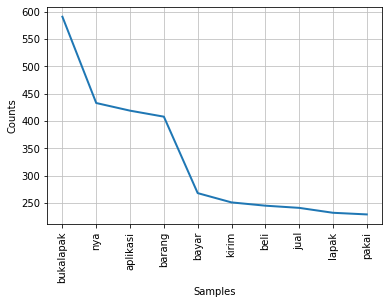

In [ ]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [ ]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update...","[langgan, setia, guna, bukalapak, update, vers...",langgan setia guna bukalapak update versi anya...,0
1,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual...","[sistem, nya, parah, seller, ecek, jual, masuk...",sistem nya parah seller ecek jual masuk ecek a...,0
2,Mizannudin Hardiyansyah,1,2022-11-10 02:18:44,aplikasi belanja yang sangat buruk cs nya ga a...,"[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, yang, sangat, buruk, cs, n...","[aplikasi, belanja, buruk, cs, nya, pakai, rob...","[aplikasi, belanja, buruk, cs, nya, pakai, rob...",aplikasi belanja buruk cs nya pakai robot chat...,0
3,Andy Askandar,1,2022-11-03 11:30:04,aplikasi yang paling tidak gunaudah di adain p...,"[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, yang, paling, tidak, gunaudah, di, ...","[aplikasi, gunaudah, mengadakan, pay, later, b...","[aplikasi, gunaudah, ada, pay, later, beli, pu...",aplikasi gunaudah ada pay later beli pulsatop ...,0
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,2,2022-11-02 04:24:26,kepada ythbukalapak kekurangan saat ini adalah...,"[kepada, ythbukalapak, kekurangan, saat, ini, ...","[kepada, ythbukalapak, kekurangan, saat, ini, ...","[ythbukalapak, kekurangan, pembayaran, transfe...","[ythbukalapak, kurang, bayar, transfer, bank, ...",ythbukalapak kurang bayar transfer bank bank b...,0
...,...,...,...,...,...,...,...,...,...,...
1295,koko vega,1,2022-07-20 04:19:24,hallo csmau tanya saya isi saldo dana kok susa...,"[hallo, csmau, tanya, saya, isi, saldo, dana, ...","[halo, csmau, tanya, saya, isi, saldo, dana, k...","[halo, csmau, isi, saldo, dana, susahnya, ampu...","[halo, csmau, isi, saldo, dana, susah, ampun, ...",halo csmau isi saldo dana susah ampun yasudah ...,0
1296,herman santoso,5,2022-09-19 10:27:42,toko online rekomended lah polonya mah mantapp...,"[toko, online, rekomended, lah, polonya, mah, ...","[toko, online, rekomendasi, lah, polonya, mah,...","[toko, online, rekomendasi, polonya, mah, mant...","[toko, online, rekomendasi, polo, mah, mantapp...",toko online rekomendasi polo mah mantappgood g...,1
1297,Ferdy Mamahit,5,2022-10-28 06:37:27,cepat dan aman sesuai deskripsi,"[cepat, dan, aman, sesuai, deskripsi]","[cepat, dan, aman, sesuai, deskripsi]","[cepat, aman, sesuai, deskripsi]","[cepat, aman, sesuai, deskripsi]",cepat aman sesuai deskripsi,1
1298,Sultan Bima Sakti,5,2022-08-19 03:06:12,belanja aneka kebutuhan jadi praktis dan efisi...,"[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, jadi, praktis, dan...","[belanja, aneka, kebutuhan, praktis, efisien, ...","[belanja, aneka, butuh, praktis, efisien, spar...",belanja aneka butuh praktis efisien sparepart ...,1


In [94]:
#create a user define function to find out polarity & subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating another user define function to label the sentiment 

def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value>0:
        return 'Positive'
    else:
        return 'Neutral'

In [96]:
from textblob import TextBlob


In [98]:
name_dataframe['Polarity']=name_dataframe['Ulasan_clean'].apply(getPolarity)
name_dataframe['Subjectivity']=name_dataframe['Ulasan_clean'].apply(getSubjectivity)
name_dataframe['Sentiment']=name_dataframe['Polarity'].apply(getSentiment)

name_dataframe['Month']=pd.DatetimeIndex(name_dataframe['Date']).month
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label,Polarity,Subjectivity,Sentiment,Month
0,Agroprobiotik Jawa Barat,2,2022-12-30 03:49:00,sy kesulitan ingin komplen masalah pembayaran ...,"[sy, kesulitan, ingin, komplen, masalah, pemba...","[saya, kesulitan, ingin, komplen, masalah, pem...","[kesulitan, komplen, pembayaran, paylater, no,...","[sulit, komplen, bayar, paylater, no, watelpon...",sulit komplen bayar paylater no watelpon susah...,0,0.00,0.00,Neutral,12
1,Ryan Apriandi,1,2023-01-05 15:39:31,aplikasi parah saya belanja dengan cc pilih kl...,"[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, saya, belanja, dengan, cc, p...","[aplikasi, parah, belanja, cc, pilih, klik, ci...","[aplikasi, parah, belanja, cc, pilih, klik, ci...",aplikasi parah belanja cc pilih klik cicil tag...,0,0.35,0.55,Positive,1
2,ferry kurniawan,1,2023-01-10 03:23:47,saya sebagai penjual ngerasa kurang nyaman ken...,"[saya, sebagai, penjual, ngerasa, kurang, nyam...","[saya, sebagai, penjual, merasa, kurang, nyama...","[penjual, nyaman, konfirmasi, pesanan, terima,...","[jual, nyaman, konfirmasi, pesan, terima, bata...",jual nyaman konfirmasi pesan terima batal mau ...,0,0.00,0.00,Neutral,1
3,Budiman Android16,1,2022-11-01 09:44:28,sistem nya paraaah seller ingin mengecek penju...,"[sistem, nya, paraaah, seller, ingin, mengecek...","[sistem, nya, parah, seller, ingin, mengecek, ...","[sistem, nya, parah, seller, mengecek, penjual...","[sistem, nya, parah, seller, ecek, jual, masuk...",sistem nya parah seller ecek jual masuk ecek a...,0,-0.40,1.00,Negative,11
4,asep dadang sudjana,3,2022-11-08 05:37:54,saya pelanggan setia pengguna bukalapak sejak ...,"[saya, pelanggan, setia, pengguna, bukalapak, ...","[saya, pelanggan, setia, pengguna, bukalapak, ...","[pelanggan, setia, pengguna, bukalapak, update...","[langgan, setia, guna, bukalapak, update, vers...",langgan setia guna bukalapak update versi anya...,0,0.00,0.00,Neutral,11


Positive words


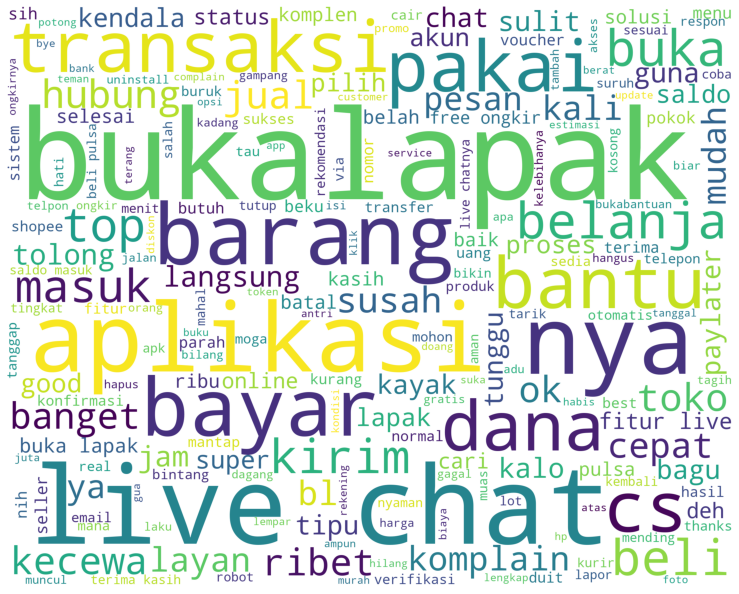

Negative words


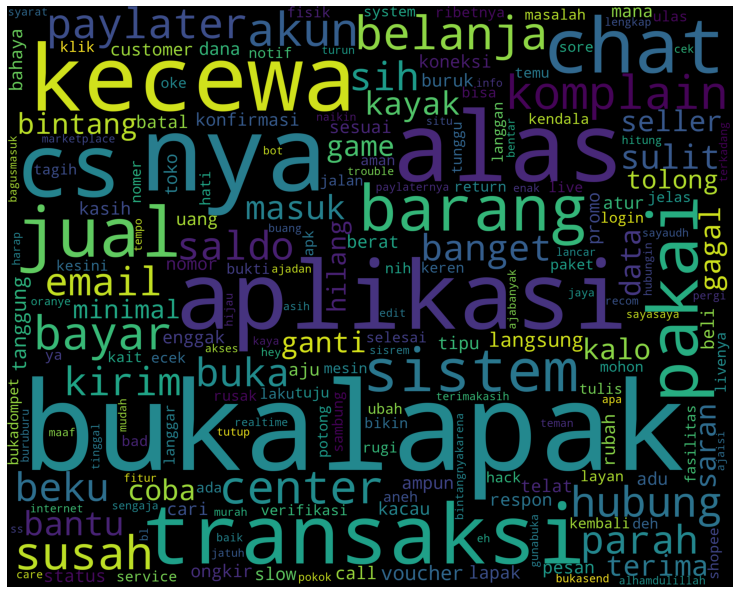

In [106]:
train_pos = name_dataframe[ name_dataframe['Sentiment'] == 'Positive']
train_pos = train_pos['Ulasan_clean']
train_neg = name_dataframe[ name_dataframe['Sentiment'] == 'Negative']
train_neg = train_neg['Ulasan_clean']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [105]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
name_dataframe["label"].value_counts()

0    781
1    519
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
Ulasan = name_dataframe['Ulasan_clean']

In [ ]:
Ulasan.isnull().sum()

0

In [ ]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3434


In [ ]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'langgan': 1648,
 'setia': 2871,
 'guna': 1096,
 'bukalapak': 500,
 'update': 3316,
 'versi': 3355,
 'anyar': 146,
 'sistem': 2922,
 'namana': 2011,
 'masuk': 1842,
 'tolong': 3207,
 'tahan': 3025,
 'riwayat': 2654,
 'kirim': 1503,
 'pantau': 2243,
 'harap': 1139,
 'jadi': 1276,
 'timbang': 3164,
 'nyaman': 2120,
 'beli': 333,
 'jual': 1344,
 'terimakasih': 3119,
 'nya': 2108,
 'parah': 2246,
 'seller': 2819,
 'ecek': 903,
 'alas': 92,
 'koneksi': 1548,
 'internet': 1255,
 'masalah': 1831,
 'akses': 68,
 'marketplace': 1824,
 'hijau': 1163,
 'oranye': 2197,
 'lancar': 1645,
 'jaya': 1304,
 'komplain': 1532,
 'kendala': 1457,
 'customer': 687,
 'service': 2857,
 'mudah': 1977,
 'aju': 62,
 'sengaja': 2839,
 'tutup': 3276,
 'terima': 3115,
 'aplikasi': 160,
 'belanja': 326,
 'buruk': 558,
 'cs': 672,
 'pakai': 2230,
 'robot': 2658,
 'chat': 626,
 'selesai': 2812,
 'hatihatai': 1152,
 'bukalapk': 533,
 'tuh': 3259,
 'live': 1723,
 'ajak': 49,
 'diskusi': 837,
 'nomor': 2089,
 'telpon': 3

In [ ]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 146)	1
  (0, 333)	1
  (0, 500)	1
  (0, 1096)	1
  (0, 1139)	1
  (0, 1276)	1
  (0, 1344)	1
  (0, 1503)	2
  (0, 1648)	1
  (0, 1842)	2
  (0, 2011)	1
  (0, 2120)	1
  (0, 2243)	1
  (0, 2654)	2
  (0, 2871)	1
  (0, 2922)	1
  (0, 3025)	1
  (0, 3119)	1
  (0, 3164)	1
  (0, 3207)	1
  (0, 3316)	2
  (0, 3355)	3
  (1, 62)	2
  (1, 68)	1
  (1, 92)	1
  :	:
  (1297, 610)	1
  (1297, 752)	1
  (1297, 2865)	1
  (1298, 131)	1
  (1298, 326)	1
  (1298, 563)	1
  (1298, 913)	1
  (1298, 1213)	1
  (1298, 2211)	1
  (1298, 2475)	1
  (1298, 2957)	1
  (1298, 3115)	1
  (1299, 142)	1
  (1299, 272)	1
  (1299, 326)	1
  (1299, 400)	1
  (1299, 1088)	1
  (1299, 1141)	1
  (1299, 1159)	1
  (1299, 1493)	1
  (1299, 1706)	1
  (1299, 2167)	1
  (1299, 2671)	1
  (1299, 2684)	1
  (1299, 3196)	1


In [ ]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

sistem nya parah seller ecek jual masuk ecek alas koneksi internet masalah akses marketplace hijau oranye lancar jaya komplain kendala customer service nya mudah aju komplain customer service nya sengaja tutup terima aju komplain


In [ ]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 62)	2
  (0, 68)	1
  (0, 92)	1
  (0, 687)	2
  (0, 903)	2
  (0, 1163)	1
  (0, 1255)	1
  (0, 1304)	1
  (0, 1344)	1
  (0, 1457)	1
  (0, 1532)	3
  (0, 1548)	1
  (0, 1645)	1
  (0, 1824)	1
  (0, 1831)	1
  (0, 1842)	1
  (0, 1977)	1
  (0, 2108)	3
  (0, 2197)	1
  (0, 2246)	1
  (0, 2819)	1
  (0, 2839)	1
  (0, 2857)	2
  (0, 2922)	1
  (0, 3115)	1
  (0, 3276)	1


In [ ]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.4777413  7.4777413  6.78459412 ... 7.4777413  7.4777413  7.4777413 ]
  (0, 3276)	0.1581241065188242
  (0, 3115)	0.10125277880773581
  (0, 2922)	0.11948195015998717
  (0, 2857)	0.30569346775573897
  (0, 2839)	0.17291016483560268
  (0, 2819)	0.12270142203169167
  (0, 2246)	0.12506562631900406
  (0, 2197)	0.2047099505394177
  (0, 2108)	0.21394522897899343
  (0, 1977)	0.09388834659330625
  (0, 1842)	0.099418519202254
  (0, 1831)	0.16012113363294445
  (0, 1824)	0.16226621944505534
  (0, 1645)	0.14005770267521125
  (0, 1548)	0.15625601241230005
  (0, 1532)	0.3168741040181643
  (0, 1457)	0.1304664337412403
  (0, 1344)	0.08978821396790136
  (0, 1304)	0.18992389222263922
  (0, 1255)	0.16226621944505534
  (0, 1163)	0.19638287432776638
  (0, 903)	0.39276574865553276
  (0, 687)	0.2940764757039421
  (0, 92)	0.15450120773550668
  (0, 68)	0.16012113363294445
  (0, 62)	0.2780839399070216


In [ ]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "label"]]

In [ ]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_label.to_excel("data_label.xlsx")

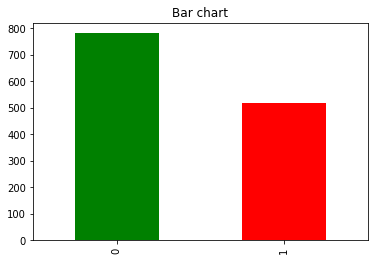

In [ ]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

In [ ]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label'],
      dtype='object')

In [ ]:
from wordcloud import WordCloud

In [ ]:
train_s0 = data_label[data_label["label"] == 0]

In [ ]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_s0

,Nama pengguna,Ulasan_clean,label
0,asep dadang sudjana,langgan setia guna bukalapak update versi anya...,0
1,Budiman Android16,sistem nya parah seller ecek jual masuk ecek a...,0
2,Mizannudin Hardiyansyah,aplikasi belanja buruk cs nya pakai robot chat...,0
3,Andy Askandar,aplikasi gunaudah ada pay later beli pulsatop ...,0
4,Wijaya KOMPUTER Laptop-PC-Android-Apple,ythbukalapak kurang bayar transfer bank bank b...,0
...,...,...,...
1281,Ian Sopyan 05,kecewa lambat kirim kurir tetangga belah,0
1287,bamztio bagas,malas belanja blmau claim asuransi barang susa...,0
1290,DenDen,menu pbb koneksi why,0
1294,yuda prakasa,tipuansetiap transaksi dana error gratis ongki...,0


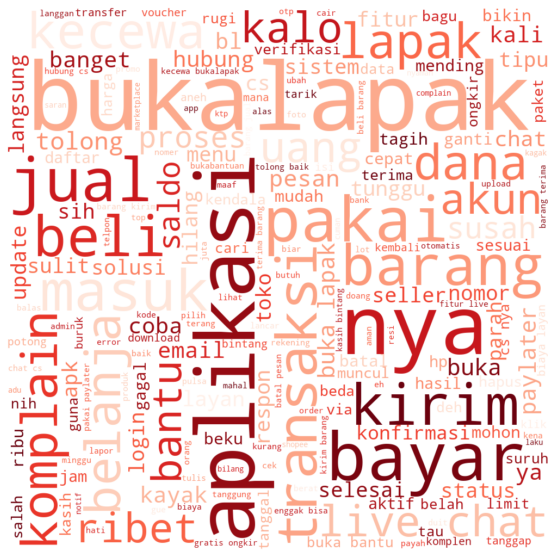

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = data_label[data_label["label"] == 1]

In [ ]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_s1

,Nama pengguna,Ulasan_clean,label
8,bisa aja,biar bintang bicara akal bagus aplikasi rangku...,1
10,HERI HERMANTO,bukalapakbukalapakpaylater bagus fitue belanja...,1
11,Dasri Haris,verifikasi email kode otp verifikasi email mas...,1
12,Catur Setiyono,aplikasi bl lot banget sih min cari barang nge...,1
13,Jundu Humam,apps nya cepat responsif hp entry level ketik ...,1
...,...,...,...
1293,Ipah Tea,bagus kelemahankami bingung no resi tembak jnt...,1
1296,herman santoso,toko online rekomendasi polo mah mantappgood g...,1
1297,Ferdy Mamahit,cepat aman sesuai deskripsi,1
1298,Sultan Bima Sakti,belanja aneka butuh praktis efisien sparepart ...,1


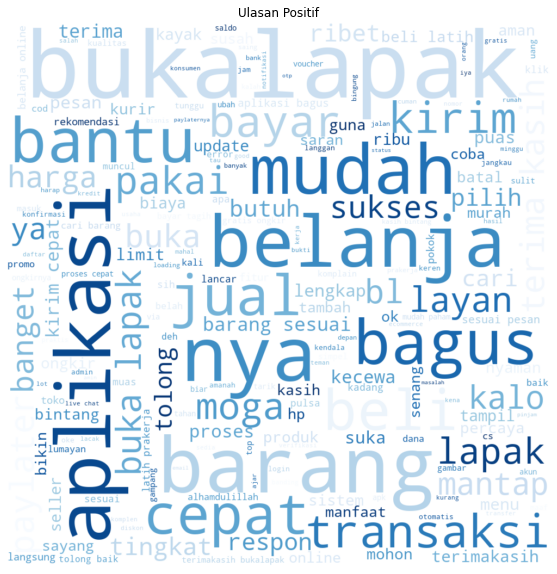

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1170, 3172)
(130, 3172)


In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.01519911082952933}

In [ ]:
nb = GaussianNB(var_smoothing=1.0)

In [ ]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[49 29]
 [ 7 45]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.88      0.63      0.73        78
           1       0.61      0.87      0.71        52

    accuracy                           0.72       130
   macro avg       0.74      0.75      0.72       130
weighted avg       0.77      0.72      0.72       130



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Regresi Logistik
logreg = LogisticRegression()
# SVM
svm = SVC(probability=True)

In [ ]:
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
y_pred1_logreg = logreg.predict(X_test)
y_pred1_svm = svm.predict(X_test)

In [ ]:
print('---------------  Regresi Logistik  -------------------')
print(classification_report(y_test, y_pred1_logreg))
print('--------------------- SVM ----------------------------')
print(classification_report(y_test, y_pred1_svm))

---------------  Regresi Logistik  -------------------
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        78
           1       0.87      0.65      0.75        52

    accuracy                           0.82       130
   macro avg       0.84      0.79      0.81       130
weighted avg       0.83      0.82      0.82       130

--------------------- SVM ----------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        78
           1       0.89      0.65      0.76        52

    accuracy                           0.83       130
   macro avg       0.85      0.80      0.81       130
weighted avg       0.84      0.83      0.82       130

